In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.model_selection import train_test_split

* Linear regression (線性迴歸)
    * wiki: 線性迴歸 (https://zh.wikipedia.org/wiki/%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8)
        * linear regression 定義
    * 使用numpy跟sympy實作Linear regression (http://terrence.logdown.com/posts/314392-simple-linear-regressionnumpy)
        * simple linear regression 實例
    * AI筆記20 - Linear regression models (https://fu-sheng-wang.blogspot.tw/2017/02/ai20-linear-regression-models.html)
        * 以二維和三維空間來解釋簡單線性迴歸和多變數的關係
    * 7 Types of Regression Techniques you should know! (https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/)
    * 回歸系列之入門篇 (https://www.uknow01.com/p20180408b628c90e1c1c/)
        * "7 Types of Regression Techniques you should know" 的總結
    * Lasso Regression (https://dotblogs.com.tw/dash_analysis/2017/11/03/161734)
    * YC Chen: 機器學習基石 學習筆記 (4)：機器可以怎麼學得更好? (http://www.ycc.idv.tw/YCNote/post/28)
        * Feature Transformation（特徵轉換）、Regularization（正規化）和Validation（驗證）
        * Regularization（正規化）：限制權重W的大小以控制高次的影響
            * 限制權重W的大小可以等價於在Ein上面加上「W大小的平方」乘上定值λ，λ越大代表W大小限制越緊；λ越小代表W大小限制越鬆
            * Regularizer的選擇常見的有兩種L2和L1，L2使用「W大小的平方」，L1則使用「W大小的絕對值」。
    * Murphy的書房: 機器學習: 正規化 (Machine learning: Regularization) (http://murphymind.blogspot.tw/2017/05/machine.learning.regularization.html)
        * 在 cost function 中使得高次項的係數變很大，去降低 target function 在高次項的權重
        
* 以下為實作 Linear Regression 的實例 (with numpy and sympy)
    * 先產生測試資料，用y=x這條方程式為基準去隨機產生一些點，上下震盪幅度約為2
    * 進行 linear regression 的實作
    * 畫出所得的 func，與原本的 y=x 比較。(用求到的 a,b 畫出回歸方程式的線)
    * 調整測試點，數字愈大，則回歸方程式的線較容易貼近 y=x

residual =  466.428571428571*a**2 + 150.0*a*b - 870.177365668691*a + 15*b**2 - 140.759293016788*b + 436.029699342434
diff by a: 932.857142857143*a + 150.0*b - 870.177365668691
diff by b: 150.0*a + 30*b - 140.759293016788
y = 0.909896 * x + 0.142499


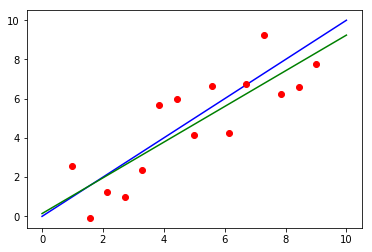

In [2]:
# 使用 numpy 跟 sympy 實作 Linear Regression

# 首先產生測試資料，用y=x這條方程式為基準去隨機產生一些點，上下震盪幅度約為2
#Target function line
X = np.linspace(0, 10) # 從 0~10 產生中間等距的50個點
f = lambda x: x #y=x
# vectorize是把一個把 python 函式包裝成一個可以對 numpy 的資料進行運算的新 function
F = np.vectorize(f)
Y = F(X)

# random data by F(X) + random residual(upper bound=2)
num = 15 # number of data，調整這個數量，觀察求得的 linear regression。數字愈大，預測線比較容易貼近原本的
# num = 100 # number of data，調整這個數量，觀察求得的 linear regression。數字愈大，預測線比較容易貼近原本的
random_sign = np.vectorize(lambda x: x if np.random.sample() > 0.5 else -x)
data_X = np.linspace(1, 9, num)
data_Y = random_sign(np.random.sample(num) * 2) + F(data_X)
plt.plot(X, Y, 'b') # render blue line
plt.plot(data_X, data_Y, 'ro') # render data point
# plt.show()

# 現在開始進行 linear regression 的實作
from sympy import *

def linear_regression(X, Y):
    a, b = symbols('a b')
    residual = 0
    
    #residualSum 求殘差
    for i in range(num):
        residual += (Y[i] - (a * X[i] + b)) ** 2
    #展開觀看方程式內容
    print("residual = ", expand(residual))
    
    #對a微分
    f1 = diff(residual, a)
    #對b微分
    f2 = diff(residual, b)
    print("diff by a:", f1)
    print("diff by b:", f2)
    
    #求聯立方程式的解
    res = solve([f1, f2], [a, b])
    return res[a], res[b]
    

a, b = linear_regression(data_X, data_Y)
print("y = %f * x + %f" % (a, b) )

# 用求到的 a,b 畫出回歸方程式的線
LR_X = X
h = lambda x: a*x + b
H = np.vectorize(h)
LR_Y = H(LR_X)
plt.plot(LR_X, LR_Y, 'g') # render green line

* 以波型資料集用當例子，看看 linear regression 的運作狀況
* 線性回迴歸所要找的 w 和 b 參數是能讓預測值和訓練集內迴歸目標標籤 y 的值之間的標準差 (mean squared error)最小, y=wx+b。
    * 標準差就是預測值和實際值之間的差值平方總和，除以樣本數量。
    * 線性迴歸沒有參數，這是它的優點，但這也使得它沒法控制模型複雜度。
* 注意 coef_ 和 intercept_， scikit-learn 總是將從訓練集得到的屬性儲存成它的末端加上底線。這可以和使用者所設定的變數有所區分。
    * intercept_ 屬性總是一個單一浮點數，而 coef_ 屬性則是每一個輸入特徵就是一個切點的 numpy array
* R^2 大約是 0.66 並沒有太好，但能看到訓練集和測試集的分數相當接近。這意味著模型似乎擬合不足，而非擬合過度。
* 由 sklearn.linear_model.LinearRegression.fit() 所取得的結果，與手動計算的結果並不一致。
    * 應該是 linear regression 的實作方式不相同。內建 func 採取的是 "標準差" 計算，而非"最小平方"。

w[0]: 0.393906  b: -0.031804


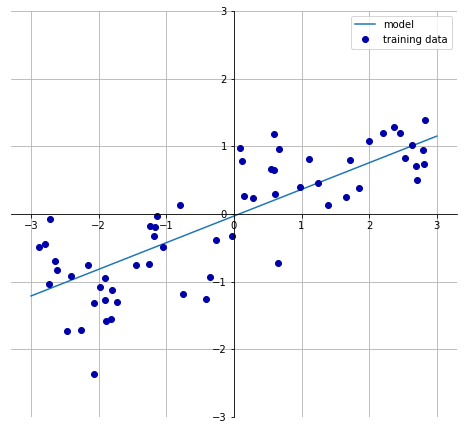

In [3]:
# 波型資料集用線性模型的預測圖
mglearn.plots.plot_linear_regression_wave()

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Training set score: 0.67
Test set score: 0.66
residual =  54.2888831039046*a**2 - 11.2758523619731*a*b - 51.2919214963987*a + 15*b**2 + 7.954086756215*b + 15.4772905674095
diff by a: 108.577766207809*a - 11.2758523619731*b - 51.2919214963987
diff by b: -11.2758523619731*a + 30*b + 7.954086756215
y = 0.462933 * x + -0.091137


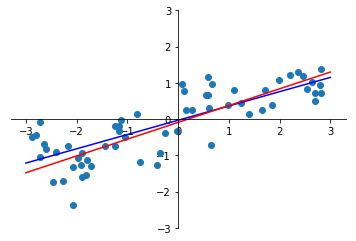

In [4]:
# 線性迴歸 (Linear regression) (最小平方法 ordianry least squares)
# 波型資料集用線性模型的表現

from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# 手動畫圖
plt.plot(X, y, 'o')
test_x = np.linspace(-3, 3, 50)
test_y = lr.coef_ * test_x + lr.intercept_
plt.ylim((-3, 3))
plt.plot(test_x, test_y, 'b')
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

# 手動計算 simple linear regression，計算結果並不相同。
print("="*30)
a, b = linear_regression(X_train, y_train)
print("y = %f * x + %f" % (a, b) )
test_yy = a * test_x + b
plt.plot(test_x, test_yy, 'r')

* Linear Regression 在像波士頓買賣房屋這類複雜的資料集上的表現
    * 發現在訓練集上的預測非常準確，但在測試集上的表現卻很糟。這是明顯的 overfitting。
    * 因此，應該試著找到一個模型能允許我們控制複雜度。其中最常用來替代標準的線性迴歸的是 "Ridge Regression"

In [5]:
# Linear Regression 在像波士頓買賣房屋這類複雜的資料集上的表現
# 房價的 median value 是 target
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
# print("lr.coef_: {}".format(len(lr.coef_)))
# print("lr.coef_: {}".format(lr.coef_))
# print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# from sklearn.datasets import load_boston
# boston = load_boston()
# # Number of Attributes: 13 numeric/categorical predictive
# # Median Value (attribute 14) is usually the target
# print("\nDescription: \n{}".format(boston.DESCR))

Training set score: 0.95
Test set score: 0.61


aphpa: 1.0 ==============
Training set score: 0.89
Test set score: 0.75
aphpa: 10 ==============
Training set score: 0.79
Test set score: 0.64
aphpa: 0.1 ==============
Training set score: 0.93
Test set score: 0.77


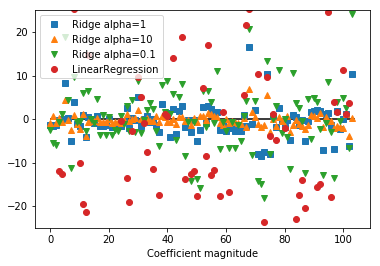

In [6]:
# Ridge Regression 在像波士頓買賣房屋這類複雜的資料集上的表現
# 調整 alpha 值，default = 1.0
# alpha 值愈大，代表限制愈大，強迫係數往 0 的方向移動 (過頭會造成 underfitting)
# alpha 值愈小，代表愈不受限制 (容易造成 overfitting)。對於非常小的 alpha 值，係數變得一點限制都沒有，結會如同原先的 Linear Regression.
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("aphpa: 1.0 ==============")
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

print("aphpa: 10 ==============")
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

print("aphpa: 0.1 ==============")
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.xlabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

* 觀察測試集的資料量，對 Linear Regression 和 Ridge Regression (alpha=1) 的影響
    * 無論是 Ridge Regerssion 或 Linear Regression，對所有的資料集大小而言，訓練分數都較高於預測分數。
    * 因為 Ridge Regresssion 是正規化，所以其訓練分數整個都低於 Linear Regression 的訓練分數。
    * Ridge Regression 的測試分數是較好的，尤其是對於小數量的資料集。
    * 少於 400 資料點，Linear Regression 並不能夠學習到任何事。
    * 當資料越來越多，兩種類型的模型都會改善，最終 Linear Regression 會趕上 Ridge Regression。

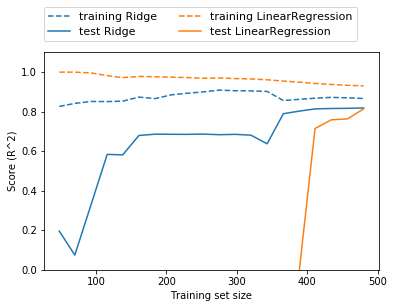

In [7]:
mglearn.plots.plot_ridge_n_samples()

* Lasso Regression
    * 如同 Ridge Regression，但使用 L1 正規化。而 L1 正規化的結果是有些係數為剛好為 0 (Ridge Regression 的係數不會為 0 ，只會盡量的小)
    * 這意味著有些特徵會完全被模型忽略，這可以被當成是一種自動化的特徵選取形式。有一些係數剛好為 0，經常讓模型更容易被解釋，並能讓模型內最動要的特徵展露出來。
* Lasso Regression 用在擴增的波士頓買賣房屋資料集上：
    * default: alpha=1.0，表現很不好
    * Lasso 也有一個正規化參數: alpha，它控制著系數被推向 0 的強度
    * 為了減少 underfitting 的狀況 (alpha=1.0)，試著將 alpha 值降低 (alpha = 0.01)，得到一個更複雜的模型，它的表現也更好。
        * 比用 Ridge Regression 更好，並且只使用了 105 個特徵值中的 33 個，使得模型更易解讀。
    * 若 alpha 值設的太低，則再次移除了正規化的影響，最後變成和 Linear Regression 一樣的 overfitting.

aphpa: 1.0 ==============
Training set score: 0.29
Test set score: 0.21
Number of features used: 4.00
aphpa: 0.01 ==============
Training set score: 0.90
Test set score: 0.77
Number of features used: 33.00
aphpa: 0.0001 ==============
Training set score: 0.95
Test set score: 0.64
Number of features used: 94.00


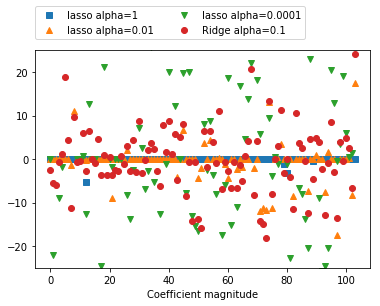

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("aphpa: 1.0 ==============")
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso.coef_ != 0)))

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("aphpa: 0.01 ==============")
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso001.coef_ != 0)))

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("aphpa: 0.0001 ==============")
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso00001.coef_ != 0)))

* 用不同 alpha 值的 Lasso Regression 和 Ridge Regression 係數幅度比較
* Lasso
    * alpha=1, 不只大部份的係數都是零，剩下的係數數值也都很小
    * alpha=0.01, 使得大部份的係數都是零
    * alpha=0.0001, 所得到的模型不夠正規化，大部份的係數均不為零，並且值得大。
* 與 Ridge (alpha = 0.1) 比較
    * Lasso (alpha = 0.01) 與此模型有相同的預測表現。但使用 Ridge 時，所有係數均不為零。
* 實際使用上，Ridge Regressioin 常是這兩種模型的第一選擇。然而
    * 假若模型有大量的特徵且預期它們大部分都不重要，Lasso 或許是最好的選擇。
    * 假若你想要有一個更容易解讀的模型，Lasso 只會選擇所輸入特徵的一部份，因此將提供一個更容易理解的模型。
* scikit-learn 也是供 ElasticNet 類別，裡頭結合 Lasso 和 Ridge 兩種懲罰。
    * 事實上，這樣的結合運作最好，雖然代價是有二個參數要調整: L1 和 L2 的正規化。

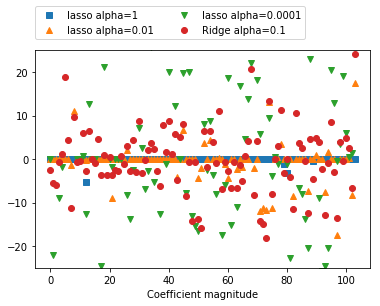

In [18]:
plt.plot(lasso.coef_, 's', label="lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.xlabel("Coefficient index")
plt.xlabel("Coefficient magnitude")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))